The following MIT license only applies to the code, and not to the text and images.

# MIT License

Copyright (c) 2024 Taha Selim, Alain Chancé, MolKet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

|||
|-|-|
|**Author:** |Taha Selim and Alain Chancé|
|**Date:** |July 10th, 2024|
|**Tutorial:** |**Version 0** <br/>  ML wavefunction generator for a diatomic system givin a vibrational frequency and a intermolecular 1D potential. |
|**MolKet's package version:** |0.2|
|**Contacts:** | Taha Selim, tahaselim@molket.io 
|             | Alain Chancé, alain.chance@gmail.com|


In [1]:
# Change according to your local installation
main_dir = "../molket.jl-main/"

"../molket.jl-main/"

In [2]:
# Load MolKet's modules and libraries

#include("../molket.jl")
include(string(main_dir, "molket.jl"))


Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum gates constructor
Load Tensor module: QTensor.jl
Load quantum gates constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load quantum_circuit constructor
Load ascii 2Darray


In [3]:
#include("MK_neural_surrogates.jl")
include(string(main_dir, "/lib_MLtest/MK_neural_surrogates.jl"))


Main.MK_neural_surrogates

First, we would like to calculate the harmonic potential of the symmetric stretch vibrational mode of $\text{CO}_2$ molecule. 

Vibrational frequency of the symmetric stretch mode of $\text{CO}_2$ is 1333 
$\text{cm}^{-1}$. (Reference: NIST database, https://webbook.nist.gov/cgi/cbook.cgi?ID=B4000020&Mask=800)

The Harmonic oscillator Hamiltonian in a second quantized form is given by:
$ \hat{H} = \hbar \omega \left( \hat{a}^{\dagger} \hat{a} + \frac{1}{2} \right) $ where $\hbar$ is the reduced Planck constant and $\omega$ is the vibrational frequency.

The terms $\hat{a}^{\dagger}$ and $\hat{a}$ are the creation and annihilation operators, respectively.

##### Mapping this particular Hamiltonian to a qubit Hamiltonian. 

Let's assume that we have 2 qubits to represent the vibrational mode. We express each vibrational level as a boson state $|n_i \rangle$ in the range $(0 \le n_i \le N_b)$.
We maps this number state to a qubit system state of $N_b + 1$ qubits using a tensor 
product of qubit states: 

$$
\begin{aligned}
\left|n_i\right\rangle \leftrightarrow & \left|0_0 \cdots 0_{n_i-1} 1_{n_i} 0_{n_i+1} \cdots 0_{N_b}\right\rangle \\
& =|0\rangle_0 \otimes \cdots \otimes|0\rangle_{n_i-1} \otimes|1\rangle_{n_i} \otimes|0\rangle_{n_i+1} \otimes \cdots \otimes|0\rangle_{N_b}
\end{aligned}
$$
where
$$
|0\rangle_j=\left(\begin{array}{l}
1 \\
0
\end{array}\right),|1\rangle_j=\left(\begin{array}{l}
0 \\
1
\end{array}\right),
$$
are computation basis states of qubit $j$. 

Hence, according to the formula, the state $|n_i\rangle$ = $|2_i\rangle$ at site $i$ is represented by:
$$
|2_i\rangle=|0\rangle_0 \otimes |0\rangle_1 \otimes |1\rangle_2 
$$
If we use the binary mapping, the state number $n_i$ is represented by the binary number $b_i$ of $N_b$ bits.

$$
\left|n_i\right\rangle \leftrightarrow |011 \cdots 101\rangle
$$
$$
\begin{aligned}
\left|n_i\right\rangle \leftrightarrow & |\underbrace{011 \cdots 101}_{\text {binary rep. of } n_i}\rangle \\
= & |0\rangle_1 \otimes|1\rangle_2 \otimes|1\rangle_3 \otimes \cdots \\
& \otimes|1\rangle_{N_q-2} \otimes|0\rangle_{N_q-1} \otimes|1\rangle_{N_q} .
\end{aligned}
$$

For example, the state $|2_i\rangle$ is represented by the binary number
$|2 \rangle = |1\rangle_{N_{(q = 2)} - 1} \otimes |0\rangle_{N_{(q = 2)}}  $
 leading to $|10\rangle$.

Now, we construct the matrix elements of the ladder operators $\hat{a}^{\dagger}$ and $\hat{a}$ in the qubit basis.

$$
\begin{aligned}
& \mathbf{I}_i=\left(\begin{array}{ccccc}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{array}\right) \\
& =I_1 \otimes I_2 \otimes \cdots \otimes I_{N_q}, \\
&
\end{aligned}
$$


We will consider the following Hamiltonian:

$$
\hat{H} = \hbar \omega \left( \hat{a}^{\dagger} \hat{a} + \frac{1}{2} \right) 
+ V_{anharmonic}
$$

The additional terms are the cubic and quartic anharmonic terms, they correct the potential energy surface of the molecule of interest which is the symmetric stretch of $\text{CO}_2$.

$$  V_{anharmonic} = g_1 \tilde{Q} + t_{111} \tilde{Q}^3 + u_{1111} \tilde{Q}^4 $$

The coefficients are taken from the paper: J. Chem. Phys. 126, 124303 (2007); doi: 10.1063/1.2710256:

| Coefficient | Value | unit |
| --- | --- | --- |
| $g_1$ | $-484.9598 \times 10^{-6}$ | au=$E_h$ |
| $t_{111}$ | $203.2777 \times 10^{-6}$ | au = $E_h$ |
| $u_{1111}$ | $8.3825 \times 10^{-6}$ | au = $E_h$ |

These coefficients can be obtained from the paper: J. Chem. Phys. 126, 124303 (2007); doi: 10.1063/1.2710256:

| Coefficient | Value | unit |
| --- | --- | --- |
| $g_1$ | $-0.0030609$ | $E_{h}$ $\AA^{-1} u^{-1/2}$ |
| $t_{111}$ | $0.30667$ | $E_{h}$ $\AA^{-3} u^{-3/2}$ |
| $u_{1111}$ | $0.31927$ | $E_{h}$ $\AA^{-4} u^{-2}$ |

The conversion took place as 

``` Julia
println("unit: ", unit)

g1_constantEh = g1_constant*unit/sqrt_m_omegs
t111_constantEh = (1/6)*t111_constant*unit^3/sqrt_m_omegs^3
u1111_constantEh = (1/24)*u1111_constant*unit^4/sqrt_m_omegs^4

```


In [4]:
N = 4
# test Qcan function for each order 
unit = 1/(Ang*sqrt(amu))
mu = 1 # due to the assumption of dimensionless units
c_constant = -0.0030609
h_constant = 0.24379

# convert the constants to a.u. 
c_constant = c_constant*unit
h_constant = h_constant*unit^2
omega = sqrt(h_constant/mu)
println("omega = ", omega/cm1, " cm^-1")

sqrt_m_omegs = sqrt(mu*omega)
println("sqrt_m_omegs = ", sqrt_m_omegs)

g1_constant = -0.0030609
t111_constant = 0.30667
u1111_constant = 0.31927

# convert the constants to a.u.
g1_constantEh = g1_constant*unit/sqrt_m_omegs
t111_constantEh = (1/6)*t111_constant*unit^3/sqrt_m_omegs^3
u1111_constantEh = (1/24)*u1111_constant*unit^4/sqrt_m_omegs^4

V_anharmonic = g1_constantEh*Qcan_p1(N) + (1/6)*t111_constantEh*Qcan_p3(N) 
               + u1111_constantEh*Qcan_p4(N)/4

omega = 1343.1154739418596 cm^-1
sqrt_m_omegs = 0.07822841160624372


4×4 Matrix{ComplexF64}:
 0.0+0.0im         0.0+0.0im         0.0+0.0im         0.0+0.0im
 0.0+0.0im         0.0+0.0im         0.0+0.0im  5.13321e-6+0.0im
 0.0+0.0im         0.0+0.0im  6.28687e-6+0.0im         0.0+0.0im
 0.0+0.0im  5.13321e-6+0.0im         0.0+0.0im  1.88606e-5+0.0im

In [5]:
N = 4
npoints = 175
Qgrid = range(-5,stop=5,length=npoints)

qnum = [0,1,2,3]

V_anharmonic = g1_constantEh*Qcan_p1(N) + (1/6)*t111_constantEh*Qcan_p3(N) 
               + u1111_constantEh*Qcan_p4(N)/4
Hmat = H_harm(N;omega=omega)+  V_anharmonic

H_1D = H_ho1D(Hmat,qnum,Qgrid)
# print wavefunctions 
#println("Wavefunctions: ", H_1D.WFs)
# print the wfs in a table
show(stdout, "text/plain", real.(H_1D.WFs))

175×4 Matrix{Float64}:
 8.40301e-7   -2.32592e-6   -1.07175e-5   -0.000381707
 1.09154e-6   -3.06941e-6   -1.4404e-5    -0.00048994
 1.41328e-6   -4.03716e-6   -1.92688e-5   -0.000626501
 1.82392e-6   -5.29248e-6   -2.5659e-5    -0.000798109
 2.34625e-6   -6.91513e-6   -3.40141e-5   -0.00101288
 3.00843e-6   -9.00532e-6   -4.48884e-5   -0.00128057
 3.8451e-6    -1.16883e-5   -5.89768e-5   -0.00161284
 4.89872e-6   -1.51203e-5   -7.71469e-5   -0.00202357
 6.22116e-6   -1.94947e-5   -0.000100475  -0.00252916
 7.87551e-6   -2.50509e-5   -0.000130292  -0.00314889
 9.93827e-6   -3.2083e-5    -0.000168231  -0.00390531
 1.25018e-5   -4.09517e-5   -0.000216289  -0.00482461
 1.56774e-5   -5.20966e-5   -0.000276891  -0.00593704
 1.95983e-5   -6.60521e-5   -0.000352973  -0.00727731
 2.44239e-5   -8.34641e-5   -0.000448061  -0.00888496
 3.03436e-5   -0.000105111  -0.000566373  -0.0108047
 3.75825e-5   -0.000131924  -0.000712923  -0.013087
 4.64063e-5   -0.000165017  -0.000893636  -0.0157877
 5.712

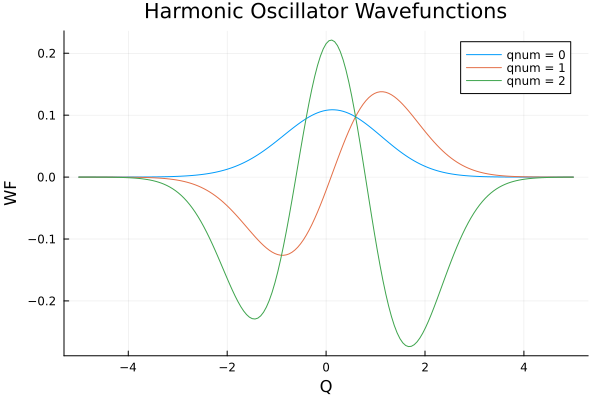

In [6]:
# plot the wavefunctions    
plot(Qgrid,H_1D.WFs[:,1],label="qnum = 0")

plot!(Qgrid,H_1D.WFs[:,2],label="qnum = 1")

plot!(Qgrid,H_1D.WFs[:,3],label="qnum = 2")

plot!(xlabel="Q",ylabel="WF",title="Harmonic Oscillator Wavefunctions")


In [7]:
qnum = [0,1,2,3]

4-element Vector{Int64}:
 0
 1
 2
 3

In [8]:
# creating a function for training 

function train_HO(N::Int64,omega::Float64,g1_constant::Float64,t111_constant::Float64,u1111_constant::Float64)
    # convert the constants to a.u.
    sqrt_m_omegs = sqrt(mu*omega)
    g1_constantEh = g1_constant*unit/sqrt_m_omegs
    t111_constantEh = (1/6)*t111_constant*unit^3/sqrt_m_omegs^3
    u1111_constantEh = (1/24)*u1111_constant*unit^4/sqrt_m_omegs^4

    V_anharmonic = g1_constantEh*Qcan_p1(N) + (1/6)*t111_constantEh*Qcan_p3(N) 
                   + u1111_constantEh*Qcan_p4(N)/4
    Hmat = H_harm(N;omega=omega) + V_anharmonic

    H_1D = H_ho1D(Hmat,qnum,Qgrid)
    return H_1D
end

train_HO (generic function with 1 method)

Now, the training could be done with respect to the following parameters:

| Parameter | Value | unit |
| --- | --- | --- |
| $\omega$ | $1333$ | $\text{cm}^{-1}$ |
| $g_1$ | $-484.9598 \times 10^{-6}$ | au=$E_h$ |
| $t_{111}$ | $203.2777 \times 10^{-6}$ | au = $E_h$ |
| $u_{1111}$ | $8.3825 \times 10^{-6}$ | au = $E_h$ |

First, we can keep everything fixed and vary only the omega. We train the resulted wavefunctions with respect to the $\omega$ parameter at each $n$ state. Hence, at any random Omega, the AI model should be able to predict the wavefunction of the system.


$\omega$ is the vibrational frequency of the symmetric stretch mode of $\text{CO}_2$ molecule. The training could be done with respect to the following values of $\omega$:

800 cm$^-1$ < $\omega$ < 1600 cm$^-1$ in steps of 100 cm$^-1$.

In [9]:
# test the function
N = 4
omega = sqrt(h_constant/mu)
g1_constant = -0.0030609
t111_constant = 0.30667
u1111_constant = 0.31927


# train the model
H_1D = train_HO(N,omega,g1_constant,t111_constant,u1111_constant)
# print wavefunctions
#println("Wavefunctions: ", H_1D.WFs)
# print the wfs in a table
show(stdout, "text/plain", real.(H_1D.WFs))


175×4 Matrix{Float64}:
 8.40301e-7   -2.32592e-6   -1.07175e-5   -0.000381707
 1.09154e-6   -3.06941e-6   -1.4404e-5    -0.00048994
 1.41328e-6   -4.03716e-6   -1.92688e-5   -0.000626501
 1.82392e-6   -5.29248e-6   -2.5659e-5    -0.000798109
 2.34625e-6   -6.91513e-6   -3.40141e-5   -0.00101288
 3.00843e-6   -9.00532e-6   -4.48884e-5   -0.00128057
 3.8451e-6    -1.16883e-5   -5.89768e-5   -0.00161284
 4.89872e-6   -1.51203e-5   -7.71469e-5   -0.00202357
 6.22116e-6   -1.94947e-5   -0.000100475  -0.00252916
 7.87551e-6   -2.50509e-5   -0.000130292  -0.00314889
 9.93827e-6   -3.2083e-5    -0.000168231  -0.00390531
 1.25018e-5   -4.09517e-5   -0.000216289  -0.00482461
 1.56774e-5   -5.20966e-5   -0.000276891  -0.00593704
 1.95983e-5   -6.60521e-5   -0.000352973  -0.00727731
 2.44239e-5   -8.34641e-5   -0.000448061  -0.00888496
 3.03436e-5   -0.000105111  -0.000566373  -0.0108047
 3.75825e-5   -0.000131924  -0.000712923  -0.013087
 4.64063e-5   -0.000165017  -0.000893636  -0.0157877
 5.712

# Create a neural network surrogate function for the wavefunction

In [10]:
#include("MK_neural_surrogates.jl")
#include(string(main_dir, "/lib_MLtest/MK_neural_surrogates.jl"))

In [11]:
import .MK_neural_surrogates: Param, run_surrogate

## Setup param data structure

In [12]:
param = Param()

Param(Main.MK_neural_surrogates.var"#2#4"(), false, [0, 1, 2, 3], 175, -5.0:0.05747126436781609:5.0, 0, 1200.0, -0.0030609, 0.30667, 0.31927, 0.7, false, 0.001, 10, 40000, 50000, 10, 1.0e-5, 0.1, true, true, "model.jld2")

In [13]:
#-----------------------------------------------------
# Setup function zerofy! that chops off small numbers
#-----------------------------------------------------
function zerofy!(x, vmin)
    for (i, val) in enumerate(x)
        if abs(val) < vmin
            x[i] = zero(eltype(x))
        end
    end
end

#------------------------------------------------------------------------------------------------------------------------------------------
# Setup function f that computes a matrix of Wavefunctions given omega
# The vec() is an inbuilt function in julia which is used to reshape the specified array as a one-dimensional column vector i.e, 1D array.
# https://www.geeksforgeeks.org/reshaping-array-as-a-vector-in-julia-array-vec-method/
#------------------------------------------------------------------------------------------------------------------------------------------
function f(omega::Float64; param::Param=param)

    # Retrieve parameters from param data structure
    verbose1 = param.verbose1
    qnum = param.qnum
    npoints = param.npoints
    n = param.n
    g1_constant = param.g1_constant
    t111_constant = param.t111_constant
    u1111_constant = param.u1111_constant
    shift = param.shift
    zerofy = param.zerofy 
    vmin = param.vmin
    
    N = size(qnum)[1]
    
    n = max(0,n) + 1
    n = min(n, N)
    
    # convert the constants to a.u.
    sqrt_m_omegs = sqrt(mu*omega)
    g1_constantEh = g1_constant*unit/sqrt_m_omegs
    t111_constantEh = (1/6)*t111_constant*unit^3/sqrt_m_omegs^3
    u1111_constantEh = (1/24)*u1111_constant*unit^4/sqrt_m_omegs^4

    V_anharmonic = g1_constantEh*Qcan_p1(N) + (1/6)*t111_constantEh*Qcan_p3(N) 
                   + u1111_constantEh*Qcan_p4(N)/4
    
    Hmat = H_harm(N;omega=omega) + V_anharmonic

    Qgrid = range(-5,stop=5,length=npoints)
    H_1D = H_ho1D(Hmat,qnum,Qgrid)
    WFs = real.(H_1D.WFs)[:,n]
    
    for (i, val) in enumerate(WFs)
        WFs[i] += shift
    end

    m = maximum(WFs)
    if m > 1.0
        WFs = (1.0/m).*WFs
    end

    if zerofy
        zerofy!(WFs, vmin)
    end
    
    return vec(WFs)
end

f (generic function with 1 method)

### Store f in param structure

In [14]:
param.f = f

f (generic function with 1 method)

## Train and run neural network surrogate function

For 1D ML fitting, the neural network surrogate is defined as:
```
MyModel() = Chain(
    Dense(1, 20, \sigma),
    Dense(20, 80, \sigma),
    Dense(80, npoints, \sigma)
)
```

### omega = 400


Building a neural surrogate function that predicts the function f()

build_surrogate - x: 
[400.0]

build_surrogate - y: 
[0.5000004040274522, 0.5000005376391852, 0.5000007130771209, 0.5000009426438514, 0.5000012420078036, 0.5000016310473113, 0.5000021348842906, 0.5000027851441194, 0.5000036214838531, 0.5000046934368846, 0.5000060626285391, 0.5000078054237544, 0.5000100160748342, 0.5000128104440569, 0.5000163303824748, 0.5000207488522155, 0.500026275884672, 0.5000331654706944, 0.5000417234807815, 0.5000523167127577, 0.5000653831608792, 0.5000814435930612, 0.5001011145112413, 0.5001251225530455, 0.5001543203701574, 0.5001897039894191, 0.5002324316260514, 0.5002838438739706, 0.5003454851456175, 0.5004191261728607, 0.5005067873115027, 0.5006107623151448, 0.5007336421604727, 0.5008783384166601, 0.5010481055582657, 0.5012465615259393, 0.501477705745193, 0.5017459337236791, 0.5020560472655788, 0.5024132592720187, 0.5028231920434058, 0.5032918679679674, 0.5038256914754509, 0.5044314211606491

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(1 => 20, σ)   # 40 parameters
│   summary(x) = "1-element Vector{Float64}"
└ @ Flux ~/.julia/packages/Flux/Mhg1r/src/layers/stateless.jl:60


Epoch 1000: Loss = 5.366e-04
Epoch 2000: Loss = 2.399e-05
Epoch 3000: Loss = 1.106e-06
Epoch 4000: Loss = 5.216e-08
Epoch 5000: Loss = 2.544e-09
Epoch 6000: Loss = 2.128e-10
Epoch 7000: Loss = 6.306e-11
Epoch 8000: Loss = 3.047e-11
Iteration: 10, delta = euclidean(model(x), y): 6.145e-05

delta = euclidean(model(x), y): 6.145e-05

delta target: 1.0e-5

y_pred: Float32[0.5000038, 0.50000435, 0.5000055, 0.500005, 0.4999971, 0.5000039, 0.5000065, 0.49999923, 0.50000876, 0.50000864, 0.50000066, 0.5000133, 0.5000043, 0.50000846, 0.50002, 0.50001645, 0.5000224, 0.5000297, 0.50004745, 0.50004923, 0.50006914, 0.5000862, 0.50010633, 0.5001233, 0.5001595, 0.500194, 0.5002351, 0.50028044, 0.5003412, 0.5004232, 0.5005107, 0.5006076, 0.50073737, 0.50087243, 0.5010536, 0.50124973, 0.5014818, 0.50175124, 0.50206125, 0.50240946, 0.5028194, 0.5032882, 0.50382185, 0.50443465, 0.50512075, 0.5058903, 0.5067482, 0.5077145, 0.5087973, 0.50999075, 0.51130784, 0.512747, 0.5143337, 0.5160643, 0.5179431, 0.5199

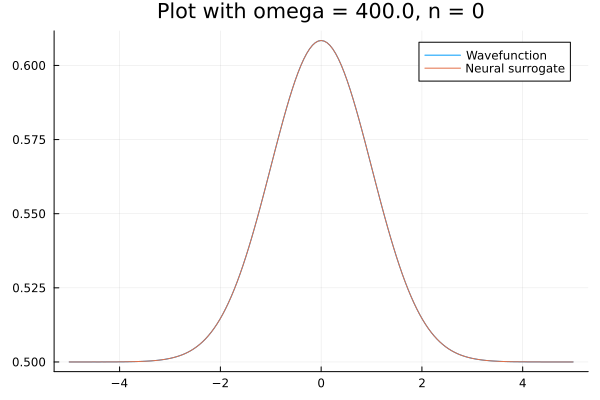

" "

In [15]:
neural, x, y = run_surrogate(; param=param, omega=400.0, n=0, shift=0.5, grad=0.1, verbose1=true)
" "


delta = euclidean(model(x), y): 5.930e-05



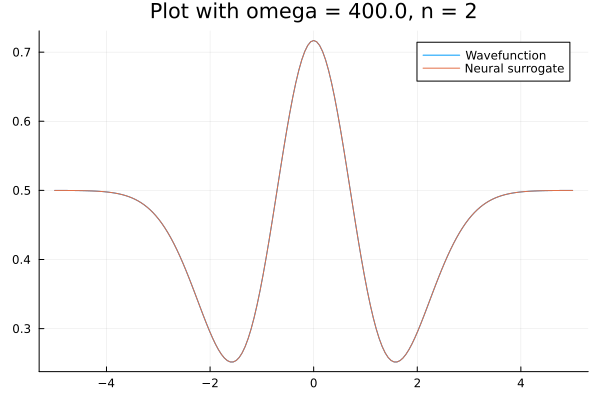

" "

In [16]:
neural, x, y = run_surrogate(; param=param, omega=400.0, n=2, shift=0.5, grad=0.1, verbose1=false)
" "


delta = euclidean(model(x), y): 3.223e-03



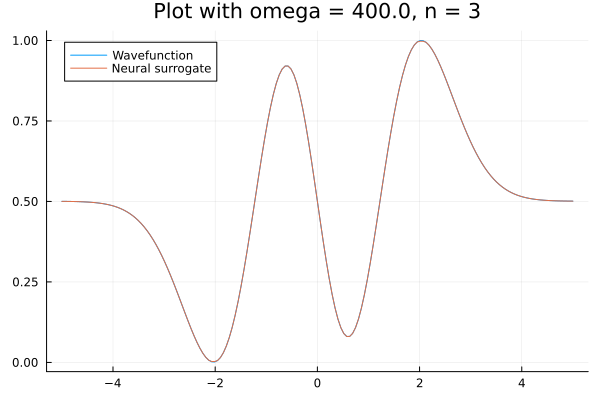

(Chain(Dense(1 => 20, σ), Dense(20 => 80, σ), Dense(80 => 175, σ)), [400.0], Any[[0.5003540854750185, 0.5002625953344009, 0.5001471727032396, 0.5000021464851306, 0.4998206658735697, 0.4995944980543379, 0.4993138019862911, 0.49896687810794477, 0.4985398946266954, 0.49801659207489507  …  0.5033371946375286, 0.5028138920864836, 0.5023869086058408, 0.5020399847279797, 0.5017592886603194, 0.5015331208413943, 0.5013516402300761, 0.5012066140121583, 0.5010911913811467, 0.5009997012406463]])

In [17]:
neural, x, y = run_surrogate(; param=param, omega=400.0, n=3, shift=0.58905, grad=1.0, verbose1=false)

### omega = 800


delta = euclidean(model(x), y): 6.164e-05



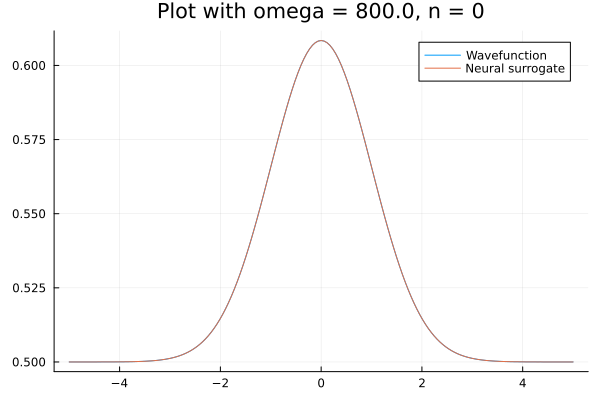

" "

In [18]:
neural, x, y = run_surrogate(; param=param, omega=800.0, n=0, shift=0.5, grad=0.1, verbose1=false)
" "


delta = euclidean(model(x), y): 7.657e-05



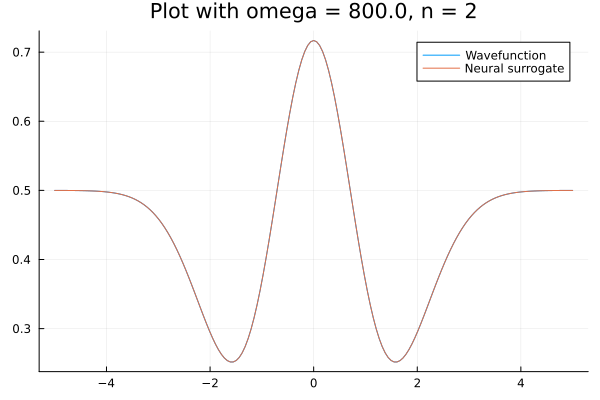

" "

In [19]:
neural, x, y = run_surrogate(; param=param, omega=800.0, n=2, shift=0.5, grad=0.08, verbose1=false)
" "


delta = euclidean(model(x), y): 4.019e-03



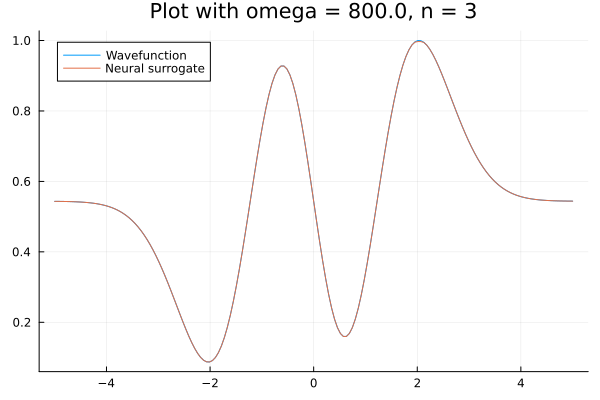

" "

In [20]:
neural, x, y = run_surrogate(; param=param, omega=800.0, n=3, shift=0.7, grad=10.0, verbose1=false)
" "

### omega = 1200


delta = euclidean(model(x), y): 5.646e-05



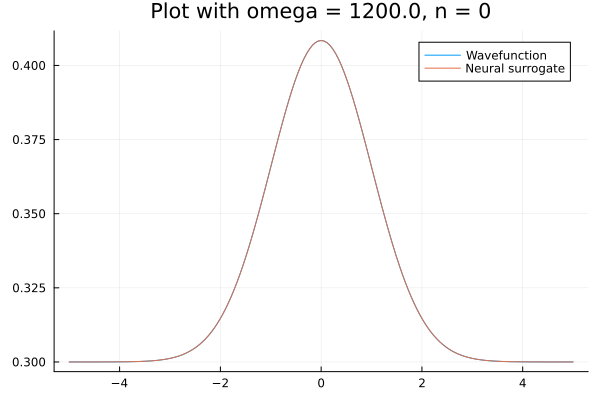

" "

In [21]:
neural, x, y = run_surrogate(;  param=param, omega=1200.0, n=0, shift=0.3, grad=0.1, verbose1=false)
" "


delta = euclidean(model(x), y): 6.884e-04



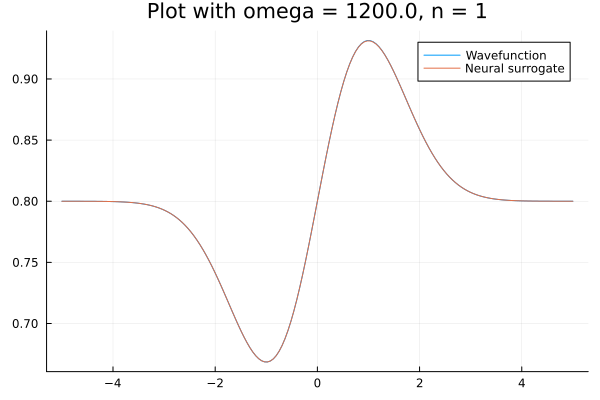

" "

In [22]:
neural, x, y = run_surrogate(;  param=param, omega=1200.0, n=1, shift=0.8, grad=0.08, verbose1=false)
" "


delta = euclidean(model(x), y): 1.085e-02



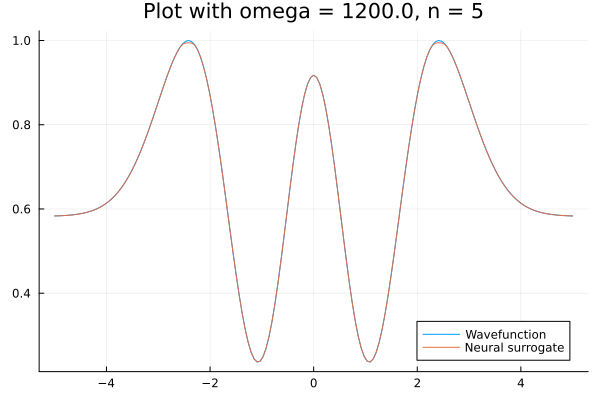

" "

In [23]:
neural, x, y = run_surrogate(;  param=param, omega=1200.0, qnum=[0, 1, 2, 3, 4], n=5, shift=0.8, grad=1.0, verbose1=false)
" "

### omega = 1500


delta = euclidean(model(x), y): 6.297e-05



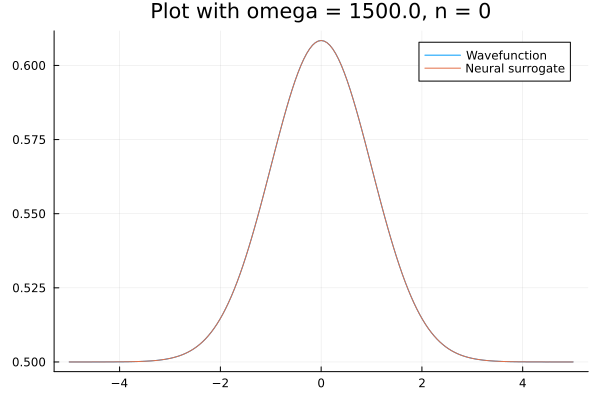

" "

In [24]:
neural, x, y = run_surrogate(; param=param, omega=1500.0, n=0, shift=0.5, grad=0.1, verbose1=false)
" "


delta = euclidean(model(x), y): 7.878e-04



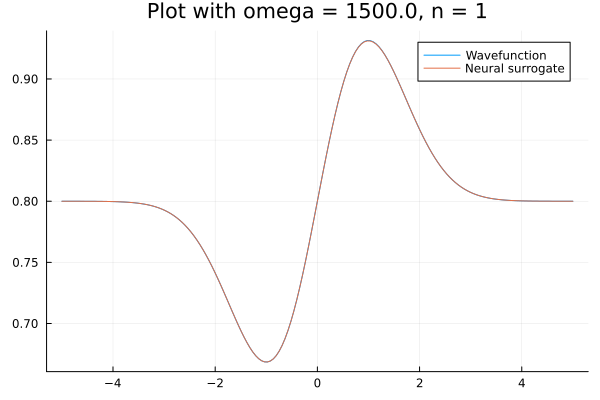

" "

In [25]:
neural, x, y = run_surrogate(; param=param, omega=1500.0, n=1, shift=0.8, grad=0.08, verbose1=false)
" "


delta = euclidean(model(x), y): 2.586e-02



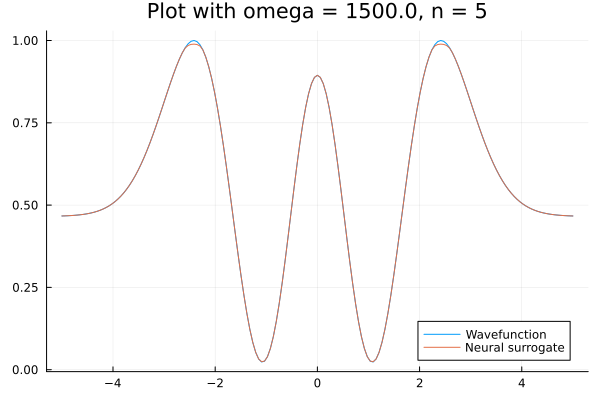

" "

In [26]:
neural, x, y = run_surrogate(; param=param, omega=1500.0, qnum=[0, 1, 2, 3, 4], n=5, shift=0.5, grad=0.1, verbose1=false)
" "

### omega = 1800


delta = euclidean(model(x), y): 6.210e-05



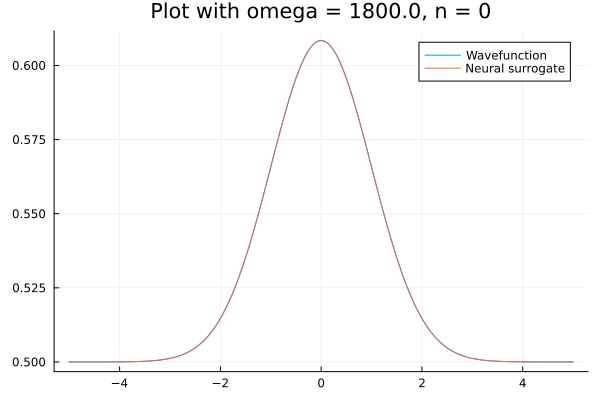

" "

In [27]:
neural, x, y = run_surrogate(; param=param, omega=1800.0, n=0, shift=0.5, grad=0.1, verbose1=false)
" "


delta = euclidean(model(x), y): 7.398e-04



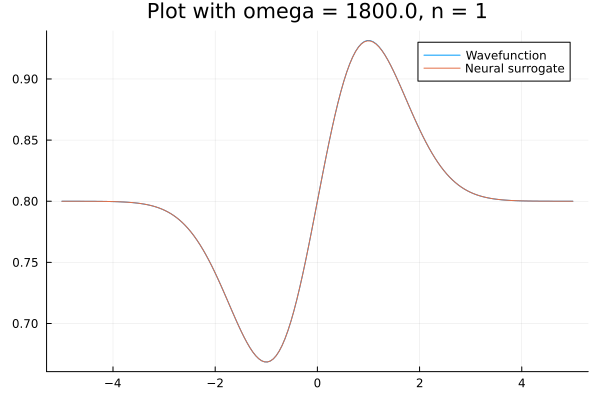

" "

In [28]:
neural, x, y = run_surrogate(; param=param, omega=1800.0, n=1, shift=0.8, grad=0.08, verbose1=false)
" "


delta = euclidean(model(x), y): 1.955e-02



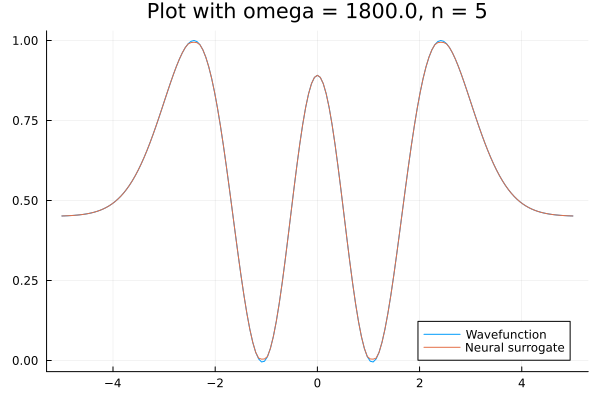

(Chain(Dense(1 => 20, σ), Dense(20 => 80, σ), Dense(80 => 175, σ)), [1800.0], Any[[0.4516576487084375, 0.45197927366167806, 0.4523789878718157, 0.4528735964200111, 0.45348294982067167, 0.454230352820115, 0.4551429931825057, 0.45625238199356405, 0.4575947940875207, 0.45921169389934197  …  0.45921169389785177, 0.45759479408632364, 0.45625238199260615, 0.4551429931817422, 0.4542303528195087, 0.45348294982019205, 0.4528735964196332, 0.452378987871519, 0.451979273661446, 0.4516576487082567]])

In [29]:
neural, x, y = run_surrogate(; param=param, omega=1800.0, qnum=[0, 1, 2, 3, 4], n=5, shift=0.47, grad=0.08, verbose1=false)

### Julia version

In [30]:
# Display Julia version information
versioninfo() 

Julia Version 1.11.2
Commit 5e9a32e7af2 (2024-12-01 20:02 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 16 × AMD Ryzen 7 6800H with Radeon Graphics
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, znver3)
Threads: 1 default, 0 interactive, 1 GC (on 16 virtual cores)
